@> PDB file is found in working directory (2jyb.pdb.gz).
@> 2467 atoms and 20 coordinate set(s) were parsed in 0.17s.
@> PDB file is found in working directory (1vdr.pdb.gz).
@> 2489 atoms and 1 coordinate set(s) were parsed in 0.04s.
<ipython-input-41-c57e50cb1d4a>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


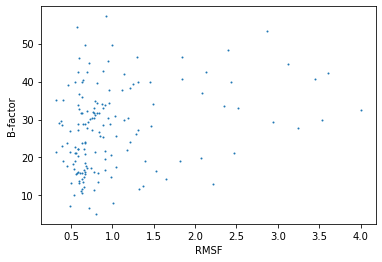

In [41]:
import prody as pd
import numpy as np
import pandas as pan
import matplotlib.pyplot as plt
import random

NMR = pd.parsePDB('2JYB')
RSA = pd.parsePDB('1VDR')

rsa_resnums = []
for res in RSA.iterResidues():
    if res.getChid() == 'A' and ('CA' in res.getNames()):
        rsa_resnums.append(res.getResnum())

nmr_resnums = []
for res in NMR.iterResidues():
    if res.getChid() == 'A' and ('CA' in res.getNames()):
        nmr_resnums.append(res.getResnum())

RMSFs = [np.mean(pd.calcRMSF(res)) for res in NMR.iterResidues() if res.getResnum() in rsa_resnums]
RMSFres = [res for res in NMR.iterResidues() if res.getResnum() in rsa_resnums] # Все совпадающие остатки из ЯМР


Bs = []
Bres = [res for res in RSA.iterResidues() if res.getChid() == 'A' and ('CA' in res.getNames()) and (res.getResnum() in nmr_resnums)] # Все совпадающие остатки из РСА
for res in RSA.iterResidues():
    if res.getChid() == 'A' and ('CA' in res.getNames()) and (res.getResnum() in nmr_resnums):
        Bs.append(np.mean(res.getBetas()))

#random.shuffle(RMSFs)
#random.shuffle(Bs)
fig, ax = plt.subplots()
ax.scatter(RMSFs,Bs,s=1)
ax.set_ylabel('B-factor')
ax.set_xlabel('RMSF')
fig.show()
#fig.savefig('2_1_rand')

In [26]:
# Проверка что все остатки совпали
proof = []
for i in range(len(Bres)):
    if RMSFres[i].getResnum() == Bres[i].getResnum():
        proof.append(1)
    else:
        proof.append(0)
proof        

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [68]:
for a in Bres[51]:
    print(a)
print('xxxxxx')    
for a in RMSFres[51]:
    if 'H' != a.getName()[0]:
        print(a)
selection = RMSFres[122].select('not hydrogen') 
pd.calcRMSF(selection)

Atom N (index 397)
Atom CA (index 398)
Atom C (index 399)
Atom O (index 400)
xxxxxx
Atom N (index 813)
Atom CA (index 814)
Atom C (index 815)
Atom O (index 816)
Atom CB (index 817)
Atom CG (index 818)
Atom CD (index 819)
Atom NE (index 820)
Atom CZ (index 821)
Atom NH1 (index 822)
Atom NH2 (index 823)


array([1.32142624, 1.62254109, 1.17273168, 1.96623011, 2.79438427,
       3.6052503 , 4.24741552, 4.75568957, 4.57256324])

In [20]:
# Проверяю где кол-во атомов или их имена не совпадают
# 
all_bs = []
all_RMSFs = []
correct = []
incorrect = []

for i in range(len(Bres)):
    rsa_atoms = [a for a in Bres[i]]
    sele = RMSFres[i].select('not hydrogen') 
    nmr_atoms = [a for a in sele]
    if len(rsa_atoms) == len(nmr_atoms) and ([a.getName() for a in rsa_atoms] == [a.getName() for a in nmr_atoms]): # проверяю все ли атомы на месте и все ли совпадают
        correct.append(1)
    else:
        correct.append(0)
        incorrect.append(i)
incorrect    

[35, 51, 122, 134, 136, 138]

1179
1179


<ipython-input-35-358165a69340>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


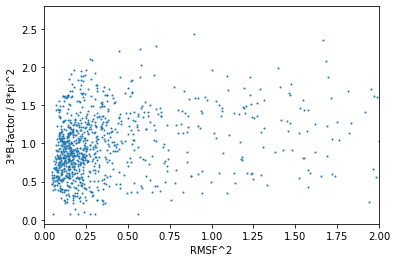

In [35]:
import random
RMSFs = []
Bs = []

for i in range(len(Bres)):
    if i not in incorrect:  # не беру не совпадающие ак так как их всего 6
        Bs += list(Bres[i].getBetas())
        sele = RMSFres[i].select('not hydrogen') 
        RMSFs += list(pd.calcRMSF(sele))
print(len(RMSFs))
print(len(Bs))

#random.shuffle(RMSFs)
#random.shuffle(Bs)
RMSFs = np.array(RMSFs)
Bs = np.array(Bs)
y = np.square(RMSFs)
x = (3 * Bs) / (8 * np.square(np.pi))

fig, ax = plt.subplots()
ax.scatter(y,x,s=1)
ax.set_ylabel('3*B-factor / 8*pi^2')
ax.set_xlabel('RMSF^2')
plt.xlim(right=2, left=0)
fig.show()
#fig.savefig('2_2_rand')

In [38]:
sele1 = NMR.select('resnum 119 and name OG')
sele2 = NMR.select('resnum 29 and name OD1')
pd.calcDistance(sele1, sele2)

TypeError: atoms2 must be Atomic instance or an array

In [43]:
lst = []
sele1 = NMR.select('resnum 17 and name NH2')
sele2 = NMR.select('resnum 22 and name O')
for i in range(20):
    sele1.setACSIndex(i)
    sele2.setACSIndex(i)
    lst.append(pd.calcDistance(sele1, sele2))
print(max(lst))
print(min(lst))
print(np.median(lst))

[18.32347058]
[6.23492293]
9.370923389994571


@> PDB file is found in working directory (3zqd.pdb.gz).
@> 2597 atoms and 20 coordinate set(s) were parsed in 0.18s.
@> PDB file is found in working directory (4a1i.pdb.gz).
@> 11563 atoms and 1 coordinate set(s) were parsed in 0.15s.
<ipython-input-37-cfca2f470f2f>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


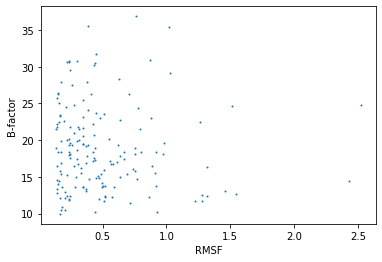